In [52]:
# Importing the Library
import numpy as np
import pandas as pd
import random
import pickle 


In [53]:
# Creating Class for Logistic Regression 
class LogitRegression:
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = list()
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, X, y, weights):
        z = np.dot(X, weights)
        h = self.sigmoid(z)
        cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        return cost
    
    def gradient_descent(self, X, y, weights):
        z = np.dot(X, weights)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights = weights - (self.learning_rate * gradient)
        return weights
    
    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, X.shape[1])
#         print(type(self.weights))
        self.loss = []
        for i in range(self.iterations):
            self.weights = self.gradient_descent(X, y, self.weights)
            self.loss.append(self.cost(X, y, self.weights))
#         print('Final loss:', self.loss)
        
        
    def predict(self, X):
        z = np.dot(X, self.weights)
        sig = self.sigmoid(z)
        pred = np.where(sig >= 0.5, 1, 0)
#         print(type(pred))
        return pred
    


In [54]:
# Read the data from CSV file 
df_penguins = pd.read_csv("penguins_size.csv")
print(df_penguins.size)
# drop missing data
df_penguins = df_penguins.dropna()
print(df_penguins.size)

2408
2338


In [55]:
# Categorial Data
df_penguins['sex'] = df_penguins['sex'].map({'MALE': 0, 'FEMALE': 1})
df_penguins = df_penguins[df_penguins['sex'].notnull()]
df_penguins['species'] = pd.Categorical(df_penguins['species']).codes
df_penguins['island'] = pd.Categorical(df_penguins['island']).codes

print(df_penguins)
print(df_penguins.info)
print(df_penguins.size)

     species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0          0       2              39.1             18.7              181.0   
1          0       2              39.5             17.4              186.0   
2          0       2              40.3             18.0              195.0   
4          0       2              36.7             19.3              193.0   
5          0       2              39.3             20.6              190.0   
..       ...     ...               ...              ...                ...   
338        2       0              47.2             13.7              214.0   
340        2       0              46.8             14.3              215.0   
341        2       0              50.4             15.7              222.0   
342        2       0              45.2             14.8              212.0   
343        2       0              49.9             16.1              213.0   

     body_mass_g  sex  
0         3750.0  0.0  
1         3800.

In [56]:
# Finding min max of non categorial data
min_body_mass = df_penguins["body_mass_g"].min()
max_body_mass = df_penguins["body_mass_g"].max()
min_culmen_length = df_penguins["culmen_length_mm"].min()
max_culmen_length = df_penguins["culmen_length_mm"].max()
min_culmen_depth = df_penguins["culmen_depth_mm"].min()
max_culmen_depth = df_penguins["culmen_depth_mm"].max()
min_flipper_length = df_penguins["flipper_length_mm"].min()
max_flipper_length = df_penguins["flipper_length_mm"].max()



In [57]:
# Rescale dataset columns to the range from 0 to 1

df_penguins["culmen_length_mm"] = (df_penguins["culmen_length_mm"] - min_culmen_length) / (max_culmen_length - min_culmen_length)
df_penguins["culmen_depth_mm"] = (df_penguins["culmen_depth_mm"] - min_culmen_depth) / (max_culmen_depth - min_culmen_depth)
df_penguins["flipper_length_mm"] = (df_penguins["flipper_length_mm"] - min_flipper_length) / (max_flipper_length - min_flipper_length)
df_penguins["body_mass_g"] = (df_penguins["body_mass_g"] - min_body_mass) / (max_body_mass - min_body_mass)

# print(df_penguins["culmen_depth_mm"])
# print(df_penguins["culmen_length_mm"])
# print(df_penguins["flipper_length_mm"])
# print(df_penguins["body_mass_g"])


In [58]:
# 5. a. We can use a binary classifier to predict which gender a penguin belongs
# to (female or male). In this case, column sex can be used as Y (target) 

X = df_penguins.drop(['sex'], axis=1)
y = df_penguins['sex']

In [59]:
# Dividing the dataset in training and testing
num_train_samples = int(0.8 * X.shape[0])
# print(num_train_samples)
X_train = X.iloc[:num_train_samples].values
y_train = y.iloc[:num_train_samples].values
X_test = X.iloc[num_train_samples:].values
y_test = y.iloc[num_train_samples:].values
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (266, 6)
y_train: (266,)
X_test: (67, 6)
y_test: (67,)


In [60]:
# Executing the Code 
learning_rate = 1e-3
# learning_rate = 0.03

iterations = 100000
model = LogitRegression(learning_rate, iterations)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8656716417910447


In [61]:

# 5. b. We can use a binary classifier to predict if a penguin’s location is
# Torgersen island or not. In this case, column island can be used as Y
# (target) 

X = df_penguins.drop('island', axis=1)
y = df_penguins['island']


# Dividing the dataset in training and testing
num_train_samples = int(0.8 * X.shape[0])
print(num_train_samples)
X_train = X.iloc[:num_train_samples].values
y_train = y.iloc[:num_train_samples].values
X_test = X.iloc[num_train_samples:].values
y_test = y.iloc[num_train_samples:].values
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

# Executing the Code 
learning_rate = 1e-3
iterations = 100000
model = LogitRegression(learning_rate, iterations)
model.fit(X_train, y_train)




266
Shape of X_train: (266, 6)
Shape of y_train: (266,)
Shape of X_test: (67, 6)
Shape of y_test: (67,)


In [62]:
results = {
    "accuracy": accuracy,
    "loss": model.loss,
}
with open("lokeshsu_assignment1_part1.pickle", "wb") as f:
    pickle.dump(results, f)
    
# with open('lokeshsu_assignment1_part1.pickle', 'rb') as f:
#     saved_data = pickle.load(f)

# View the data
# print(saved_data)

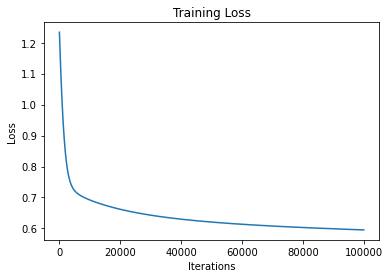

In [63]:
import matplotlib.pyplot as plt
import math

plt.plot(model.loss)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()